# Experiment Results Analysis

This notebook loads the experiment results from the JSON file, unpacks the data, and visualizes key metrics such as loss curves, forecast errors, and system resource usage. These visualizations will help compare the performance of ARIMA, Prophet, LSTM, and Transformer models for climate forecasting.

In [1]:
!pip install ace_tools

In [2]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from src.utils.result_utils import load_results, unpack_results, unpack_horizon_results

results_path = os.path.join("..", "src", "trained_models", "experiment_results.json")

results = load_results(results_path)
unpacked_results = unpack_results(results)
print("Dostępne klucze:", list(unpacked_results.keys()))

print("Experiment Timestamp:", unpacked_results.get("timestamp"))
print("\nHyperparameters:", json.dumps(unpacked_results.get("hyperparameters"), indent=4))
print("\nSystem Metrics:", json.dumps(unpacked_results.get("system_metrics"), indent=4))

{'ARIMA': {'training_time': 0.1849820613861084, 'forecast_steps': 365, 'MAE': 1.0964724810703466, 'RMSE': 1.3238670553350378, 'MAPE': 822.9020092343758, 'R2': -0.949794739514378, 'ExplainedVariance': -0.020204155397291812, 'system_metrics': {'cpu': 3.9, 'gpu': None, 'memory': 55.3}, 'forecast_series': [0.09489483162349899, 0.3944025956898938, 0.6501853663108083, 0.8087402038810059, 0.8884647306263822, 0.9206266074077676, 0.9294292997259558, 0.9291014187664202, 0.9264666232910159, 0.9241035462591554, 0.9226037184219229, 0.9218346297448877, 0.9215165024643094, 0.9214242693769663, 0.9214227131096191, 0.9214456786593956, 0.9214674441979571, 0.9214816034304539, 0.9214890078593926, 0.9214921448622342, 0.9214931018510951, 0.9214931613566785, 0.92149296338638, 0.9214927635612734, 0.9214926301611853, 0.9214925590147455, 0.9214925281708187, 0.921492518323092, 0.9214925173304488, 0.9214925190140099, 0.9214925208421397, 0.921492522096344, 0.9214925227786409, 0.9214925230810808, 0.9214925231816998,

In [3]:
horizon_results_path = os.path.join("..", "src", "trained_models", "test_horizon_results.json")
horizon_results = load_results(horizon_results_path)
unpacked_horizon = unpack_horizon_results(horizon_results)

print("Horizon Experiment Timestamp:", unpacked_horizon.get("timestamp"))
print("Available models:", list(unpacked_horizon.keys()))

{'ARIMA': {'horizon_errors': {'1': 1.1085143639377912, '2': 0.9614628636105303, '3': 0.8389734594624797, '4': 0.7594392304028017, '5': 0.7061619114396582, '6': 0.6524093247435692, '7': 0.61427014224213, '8': 0.5971723373550823, '9': 0.5915247133948756, '10': 0.5826137792362618, '11': 0.5741193135035685, '12': 0.5745464231891407, '13': 0.5644181980752049, '14': 0.5512555275195438, '15': 0.5704328644195069, '16': 0.6034358520439806, '17': 0.6101840364701192, '18': 0.5989892531078573, '19': 0.5871786376545672, '20': 0.5724167355323209, '21': 0.5588623514101728, '22': 0.5463399149868741, '23': 0.5391695760004179, '24': 0.5438942993515552, '25': 0.5374620771070738, '26': 0.5271651799355612, '27': 0.5176245838678262, '28': 0.5083297514712426, '29': 0.503843841932918, '30': 0.4990566025025503, '31': 0.517567073424409, '32': 0.5126318181278953, '33': 0.5068728011781855, '34': 0.5039919882473213, '35': 0.49984058271044796, '36': 0.49496212368351655, '37': 0.50638860598024, '38': 0.5001096943349

In [4]:
test_df = pd.read_csv('../data/processed/full/test_climate_data.csv')
print("Test data shape:", test_df.shape)
print(test_df.head())

Test data shape: (156746, 8)
         time  latitude  longitude   group_id       t2m        tp       d2m  \
0  2023-07-01     54.25      19.75  54.2_19.8  1.132583 -0.451625  1.108395   
1  2023-07-01     53.00      17.50  53.0_17.5  1.091628 -0.666596  1.228715   
2  2023-07-01     50.00      23.50  50.0_23.5  1.400424  0.649502  1.740776   
3  2023-07-01     50.25      22.25  50.2_22.2  1.324795  2.522135  1.741423   
4  2023-07-01     52.25      22.75  52.2_22.8  1.314557  0.011756  1.704457   

   time_idx  
0      1642  
1      1642  
2      1642  
3      1642  
4      1642  


In [5]:
metrics_data = []
models = ["ARIMA", "Prophet", "CustomTransformer"]

for model in models:
    if model in unpacked_results:
        m = unpacked_results[model]
        metrics_data.append({
            "Model": model,
            "Training Time (s)": m.get("training_time", None),
            "MAE": m.get("MAE", None),
            "RMSE": m.get("RMSE", None),
            "MAPE": m.get("MAPE", None),
            "R2": m.get("R2", None),
            "Explained Variance": m.get("ExplainedVariance", None)
        })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df)

               Model  Training Time (s)       MAE      RMSE          MAPE  \
0              ARIMA           0.184982  1.096472  1.323867    822.902009   
1            Prophet           0.439858  0.327259  0.416861    431.160754   
2  CustomTransformer        1134.012187  1.316768  1.316768  14436.100769   

         R2  Explained Variance  
0 -0.949795           -0.020204  
1  0.806677            0.807230  
2       NaN                 NaN  


In [6]:
horizon_data = []

for model in models:
    if model in unpacked_horizon:
        model_data = unpacked_horizon[model].get("horizon_errors", {})
        for horizon, rmse in model_data.items():
            horizon_data.append({
                "Model": model,
                "Horizon (days)": int(horizon),
                "RMSE": rmse
            })

horizon_df = pd.DataFrame(horizon_data)
print(horizon_df.head())
print(horizon_df.tail())

   Model  Horizon (days)      RMSE
0  ARIMA               1  1.108514
1  ARIMA               2  0.961463
2  ARIMA               3  0.838973
3  ARIMA               4  0.759439
4  ARIMA               5  0.706162
                  Model  Horizon (days)      RMSE
1090  CustomTransformer             361  1.630482
1091  CustomTransformer             362  1.650645
1092  CustomTransformer             363  1.648567
1093  CustomTransformer             364  1.686346
1094  CustomTransformer             365  1.638759


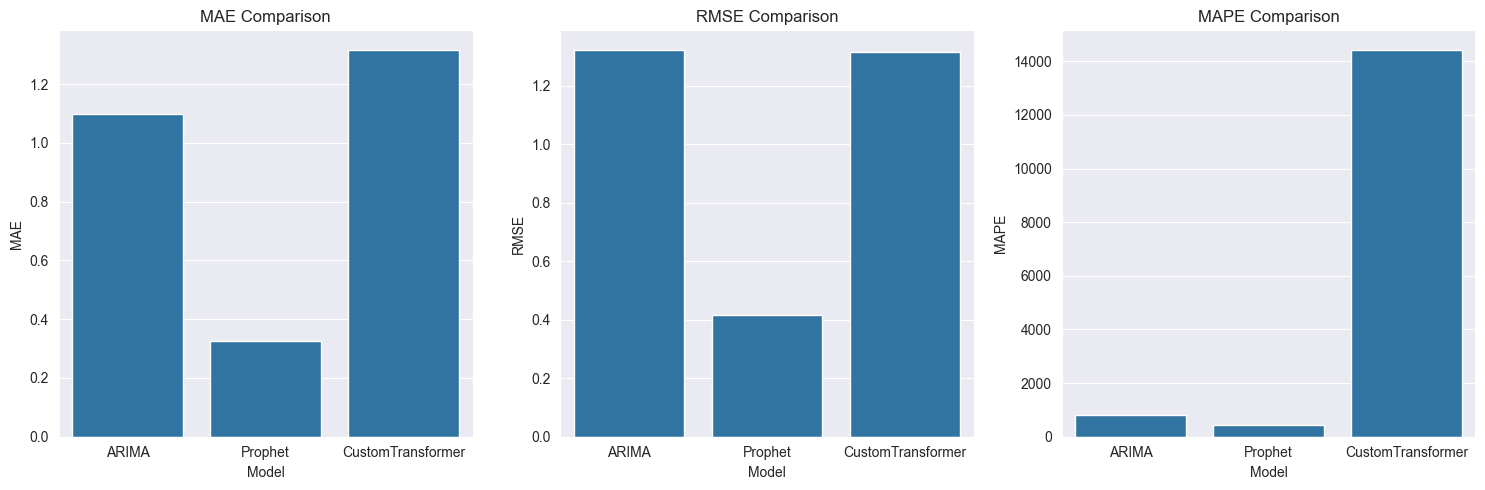

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(x="Model", y="MAE", data=metrics_df, ax=axes[0])
axes[0].set_title("MAE Comparison")

sns.barplot(x="Model", y="RMSE", data=metrics_df, ax=axes[1])
axes[1].set_title("RMSE Comparison")

sns.barplot(x="Model", y="MAPE", data=metrics_df, ax=axes[2])
axes[2].set_title("MAPE Comparison")

plt.tight_layout()
plt.show()

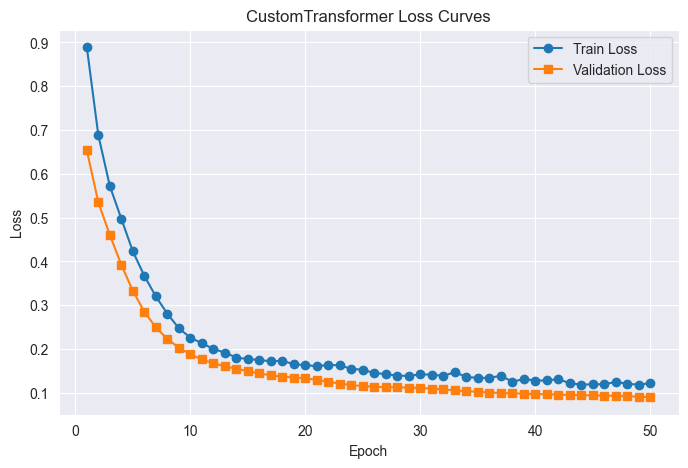

In [8]:
def plot_loss_curves(model_name, results_dict):
    if "train_loss" in results_dict and "val_loss" in results_dict:
        epochs = list(range(1, len(results_dict["train_loss"]) + 1))
        plt.figure(figsize=(8,5))
        plt.plot(epochs, results_dict["train_loss"], marker="o", label="Train Loss")
        plt.plot(epochs, results_dict["val_loss"], marker="s", label="Validation Loss")
        plt.title(f"{model_name} Loss Curves")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    else:
        print(f"No loss curves available for {model_name}")

for model in ["CustomTransformer"]:
    if model in unpacked_results:
        plot_loss_curves(model, unpacked_results[model])

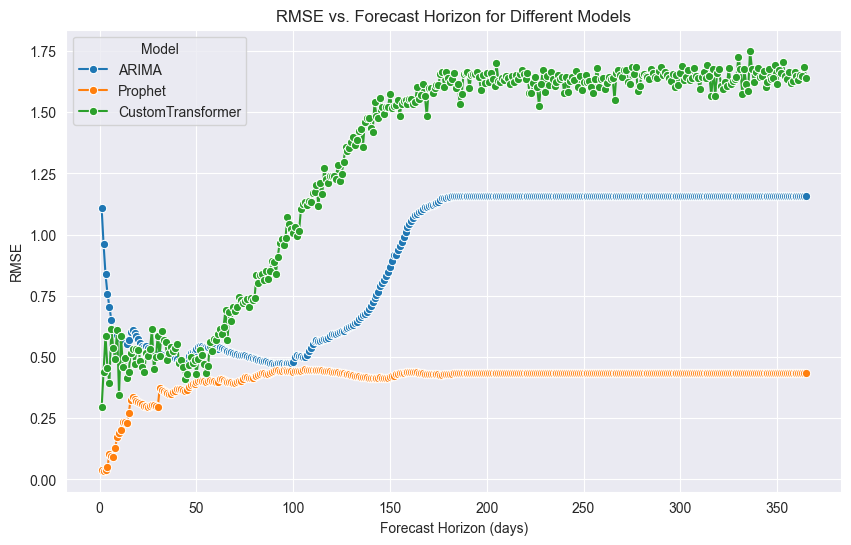

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=horizon_df, x="Horizon (days)", y="RMSE", hue="Model", marker="o")
plt.title("RMSE vs. Forecast Horizon for Different Models")
plt.xlabel("Forecast Horizon (days)")
plt.ylabel("RMSE")
plt.legend(title="Model")
plt.grid(True)
plt.show()

               Model  Max Feasible Horizon (days)
0              ARIMA                          157
1            Prophet                          365
2  CustomTransformer                          102


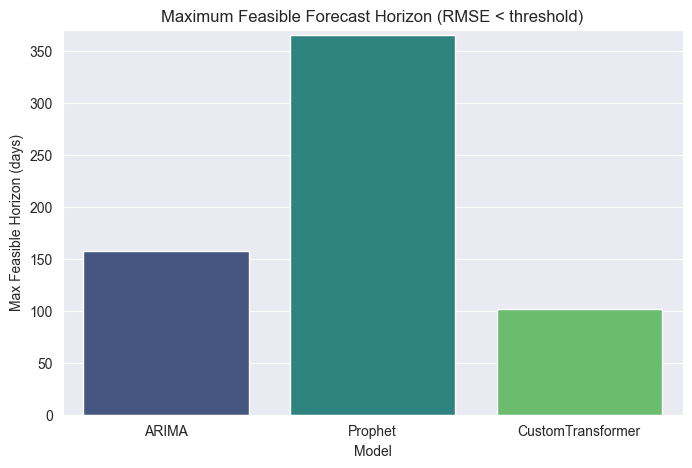

In [10]:
max_horizons = {}
for model in models:
    if model in unpacked_horizon:
        max_horizons[model] = unpacked_horizon[model].get("max_feasible_horizon", 0)

max_horizons_df = pd.DataFrame(list(max_horizons.items()), columns=["Model", "Max Feasible Horizon (days)"])
print(max_horizons_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=max_horizons_df, x="Model", y="Max Feasible Horizon (days)", palette="viridis", hue="Model")
plt.title("Maximum Feasible Forecast Horizon (RMSE < threshold)")
plt.xlabel("Model")
plt.ylabel("Max Feasible Horizon (days)")
plt.ylim(0, max(max_horizons_df["Max Feasible Horizon (days)"]) + 5)
plt.show()


Normalized Model Metrics:
                     MAE   RMSE   MAPE   R2  Explained Variance  Avg Score
Model                                                                     
ARIMA              0.777  1.000  0.028  0.0                 0.0      0.361
Prophet            0.000  0.000  0.000  1.0                 1.0      0.400
CustomTransformer  1.000  0.992  1.000  NaN                 NaN      0.997


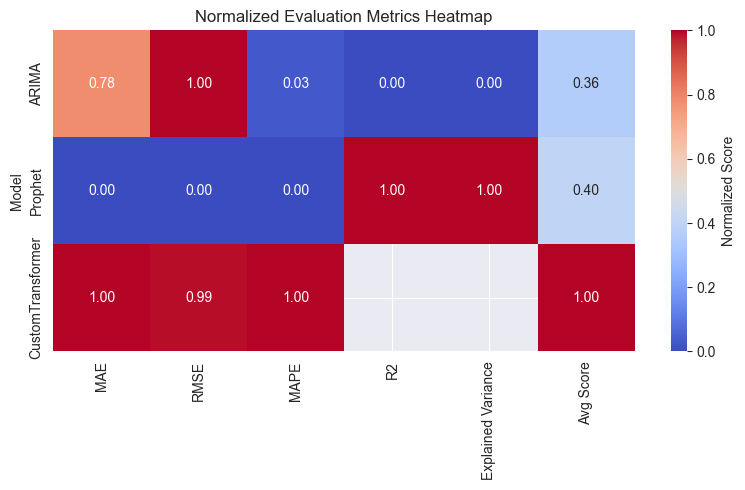

In [11]:
# Normalize all metrics except training time
normalized_metrics = metrics_df.set_index("Model").copy()
scaler = MinMaxScaler()
normalized = scaler.fit_transform(normalized_metrics.drop(columns=["Training Time (s)"]))
normalized_df = pd.DataFrame(normalized, 
                              columns=normalized_metrics.columns.drop("Training Time (s)"), 
                              index=normalized_metrics.index)

# Add average score across normalized metrics
normalized_df["Avg Score"] = normalized_df.mean(axis=1)

# Display table
print("\nNormalized Model Metrics:")
print(normalized_df.round(3))

# Heatmap of normalized values
plt.figure(figsize=(8, 5))
sns.heatmap(normalized_df, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Normalized Score"})
plt.title("Normalized Evaluation Metrics Heatmap")
plt.tight_layout()
plt.show()

               Model    RMSE_AUC
0              ARIMA  330.427842
1  CustomTransformer  476.586928
2            Prophet  149.592601


/var/folders/tb/tcj9dm_j1l3352jqwyxpc7nc0000gn/T/ipykernel_25851/498823552.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  area_data = horizon_df.groupby("Model").apply(lambda df: np.trapz(df.sort_values("Horizon (days)")["RMSE"], dx=1)).reset_index()
/var/folders/tb/tcj9dm_j1l3352jqwyxpc7nc0000gn/T/ipykernel_25851/498823552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=area_data, x="Model", y="RMSE_AUC", palette="magma")


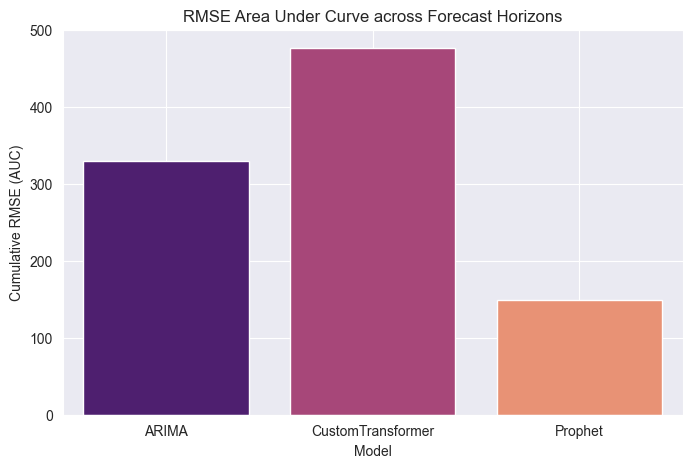

In [12]:
area_data = horizon_df.groupby("Model").apply(lambda df: np.trapz(df.sort_values("Horizon (days)")["RMSE"], dx=1)).reset_index()
area_data.columns = ["Model", "RMSE_AUC"]
print(area_data)

plt.figure(figsize=(8,5))
sns.barplot(data=area_data, x="Model", y="RMSE_AUC", palette="magma")
plt.title("RMSE Area Under Curve across Forecast Horizons")
plt.ylabel("Cumulative RMSE (AUC)")
plt.grid(True)
plt.show()

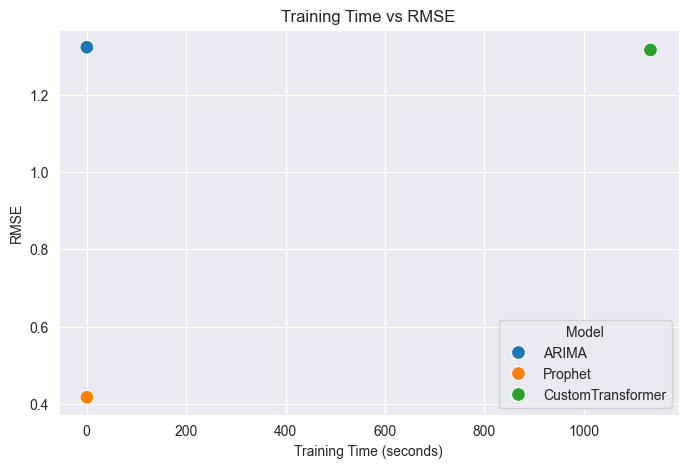

In [13]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=metrics_df, x="Training Time (s)", y="RMSE", hue="Model", s=100)
plt.title("Training Time vs RMSE")
plt.xlabel("Training Time (seconds)")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

In [14]:
if "CustomTransformer" in unpacked_results:
    residuals = unpacked_results["CustomTransformer"].get("residuals", [])
    if residuals:
        plt.figure(figsize=(8,5))
        sns.histplot(residuals, bins=30, kde=True)
        plt.title("Residual Distribution - CustomTransformer")
        plt.xlabel("Residual")
        plt.ylabel("Frequency")
        plt.grid(True)
        plt.show()

In [15]:
def plot_system_metrics(model_name, result_dict):
    if "cpu" in result_dict and "memory" in result_dict:
        epochs = list(range(1, len(result_dict["system_metrics"]) + 1))
        plt.figure(figsize=(8,5))
        plt.plot(epochs, result_dict["cpu"], marker="o", label="CPU Usage (%)")
        plt.plot(epochs, result_dict["memory"], marker="o", label="Memore Usage (%)")
        if "gpu" in result_dict:
            plt.plot(epochs, result_dict["gpu"], marker="o", label="GPU Usage (%)")

        plt.title(f"{model_name} System Metrics")
        plt.xlabel("Epoch")
        plt.ylabel("Usage (%)")
        plt.legend()
        plt.show()
    else:
        print(f"No system metrics available for {model_name}")

for model in ["CustomTransformer"]:
    if model in unpacked_results:
        plot_system_metrics(model, unpacked_results[model])

No system metrics available for CustomTransformer
